<h1>Introduction</h1>
Oily Giant yes yes

Import statements necessary to complete the task

In [174]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression	
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
plt.style.use('ggplot')

Importing the data

In [131]:
geo_data_0 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_0.csv', encoding = "utf-8")
geo_data_1 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_1.csv', encoding = "utf-8")
geo_data_2 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_2.csv', encoding = "utf-8")


This code looks at a sample of the data and basic information about the data

In [132]:
display(geo_data_0.sample(10))
geo_data_0.info()

,id,f0,f1,f2,product
48178,U9mnm,1.052510,0.093768,-2.144412,81.708529
18536,Isc2J,-0.455855,0.650987,3.403630,82.848928
93494,Qxhu8,-0.009991,0.097772,2.029930,29.927344
76872,h1Ejw,-0.067685,1.171540,5.460820,128.358064
66880,2veMg,1.322026,-0.432545,4.272873,135.865972
83556,vPntU,1.907128,0.280001,-3.883569,61.593205
8326,VJgxO,-0.462139,0.984561,0.093148,26.617934
7339,jNZM2,0.011640,0.385620,4.155736,57.804506
67960,7ABiw,-0.537726,0.969166,2.799860,33.956236
68736,fEfg8,1.410139,-0.324750,3.884874,134.005366


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [133]:
display(geo_data_1.sample(10))
geo_data_1.info()

,id,f0,f1,f2,product
43139,Ja12Z,-16.548144,3.317645,0.000972,3.179103
46387,9u1jB,11.016151,0.817353,3.003174,80.859783
22503,NGZx0,10.425247,-6.766407,-0.005077,0.000000
78253,z5oUW,-4.579727,-11.993686,4.993608,137.945408
49929,4UurH,-9.057236,-15.820631,0.998788,30.132364
69836,JV055,-3.221218,-5.325038,3.998274,110.992147
98616,ZnqRT,6.938607,0.736799,-0.000408,0.000000
95648,ajszF,-2.743267,-0.844792,0.996717,30.132364
28764,DJrRO,0.613697,3.680526,1.000492,26.953261
29933,Y2UW0,-3.452137,-5.358370,4.996954,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [134]:
display(geo_data_2.sample(10))
geo_data_2.info()

,id,f0,f1,f2,product
90137,ZkL5N,0.375441,-0.743183,-0.211727,64.188059
88837,pssmu,0.063983,-1.028743,9.176959,123.150238
5023,jDVOa,2.182029,-0.073010,6.141555,109.638289
53005,ICMRm,-2.088019,1.722390,1.296620,78.149595
99077,TJr7v,-0.635846,2.877660,1.077360,91.741177
82063,XfOwj,-0.165717,-0.944113,6.382481,108.735354
38598,jdL5g,3.253403,-0.795641,8.219881,167.178488
18328,dRRtg,2.723195,-1.498204,1.084656,122.143735
20195,ikBFB,-0.842489,1.236629,0.945800,48.545046
58815,0ppoS,-0.182899,-2.749655,4.371241,178.092724


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<h2>Data Preprocessing</h2>

This code checks for duplicate rows

In [135]:
print(geo_data_0.duplicated().sum())
print(geo_data_1.duplicated().sum())
print(geo_data_2.duplicated().sum())

0
0
0


This code checks for duplicate unique identifiers. It found some in each dataframe, so I proceeded to the next step.

In [136]:
print(geo_data_0['id'].duplicated().sum())
print(geo_data_1['id'].duplicated().sum())
print(geo_data_2['id'].duplicated().sum())

10
4
4


This code checks for duplicate data across the dataframe that corresponds to the unique identifiers. It found none, so I left the unique identifiers alone.

In [137]:
print(geo_data_0.duplicated(subset=['id', 'f0']).sum())
print(geo_data_0.duplicated(subset=['id', 'f1']).sum())
print(geo_data_0.duplicated(subset=['id', 'f2']).sum())
print(geo_data_0.duplicated(subset=['id', 'product']).sum())

0
0
0
0


In [138]:
print(geo_data_1.duplicated(subset=['id', 'f0']).sum())
print(geo_data_1.duplicated(subset=['id', 'f1']).sum())
print(geo_data_1.duplicated(subset=['id', 'f2']).sum())
print(geo_data_1.duplicated(subset=['id', 'product']).sum())

0
0
0
0


In [139]:
print(geo_data_2.duplicated(subset=['id', 'f0']).sum())
print(geo_data_2.duplicated(subset=['id', 'f1']).sum())
print(geo_data_2.duplicated(subset=['id', 'f2']).sum())
print(geo_data_2.duplicated(subset=['id', 'product']).sum())

0
0
0
0


In [140]:
def plot(df, char1, xname, titlename):
    product = df.groupby(char1)['product'].sum()
    product = product.reset_index().rename(columns={0: char1, 'product': 'product'})
    product = product.sort_values(by='product', ascending=False)
    product = product.head(200)
    product.plot(kind='scatter',                  
                   x=char1,
                   y='product',
                   title=titlename,
                   xlabel=xname,
                   ylabel='Total Reserves'

                 )
    plt.show()
    return

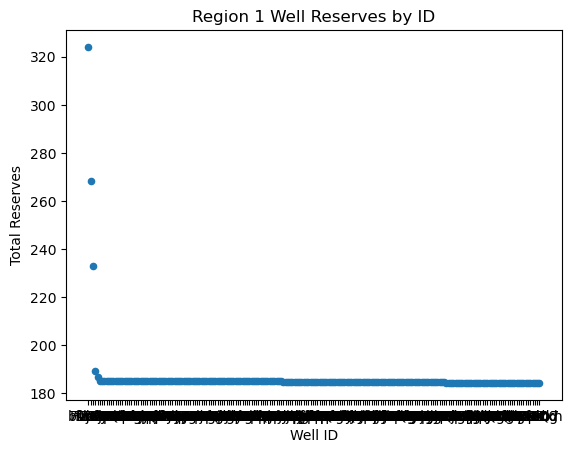

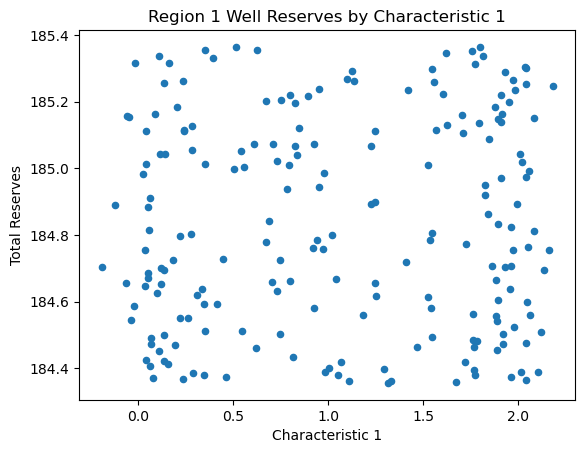

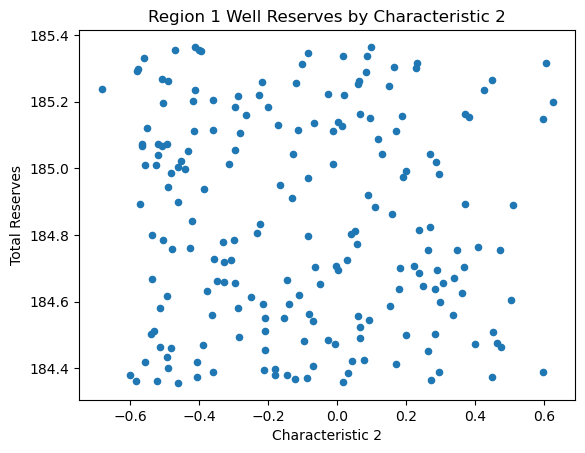

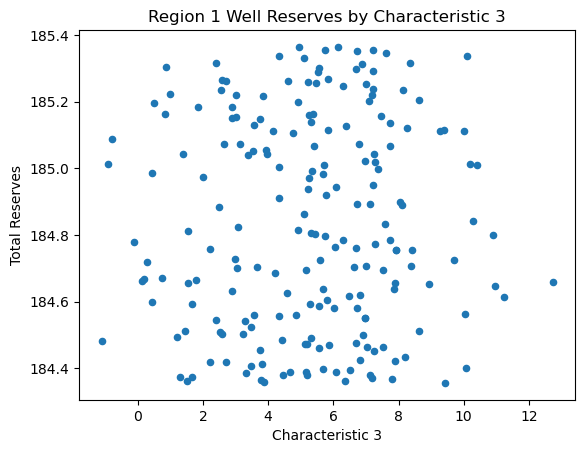

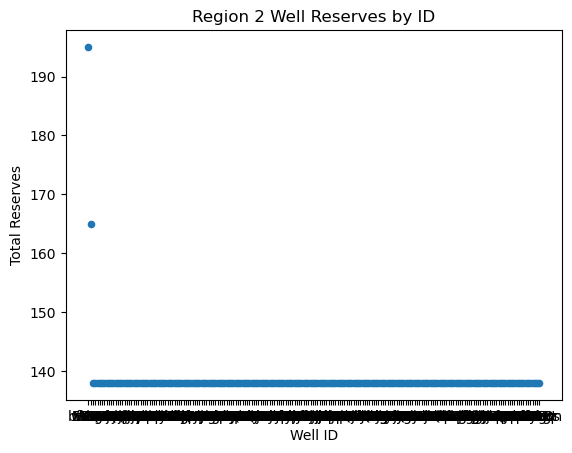

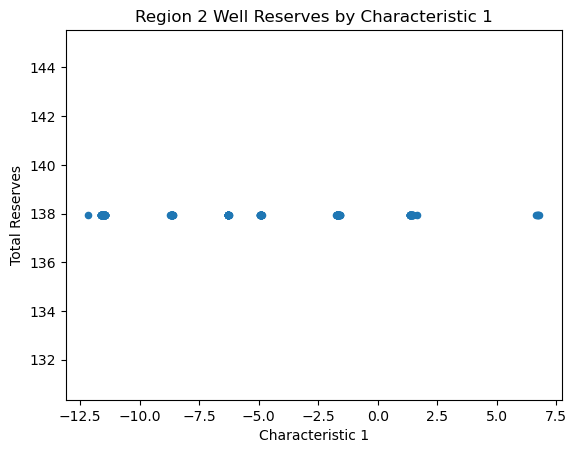

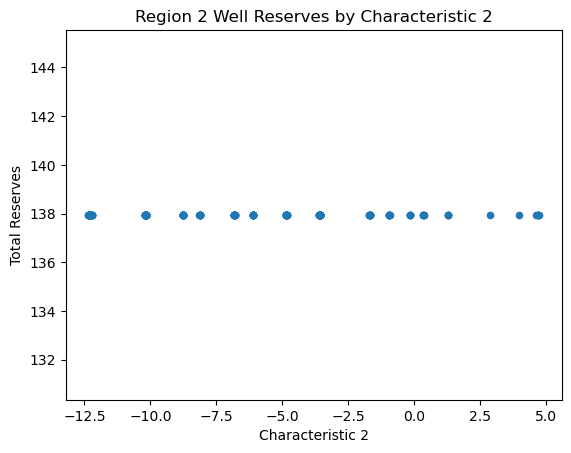

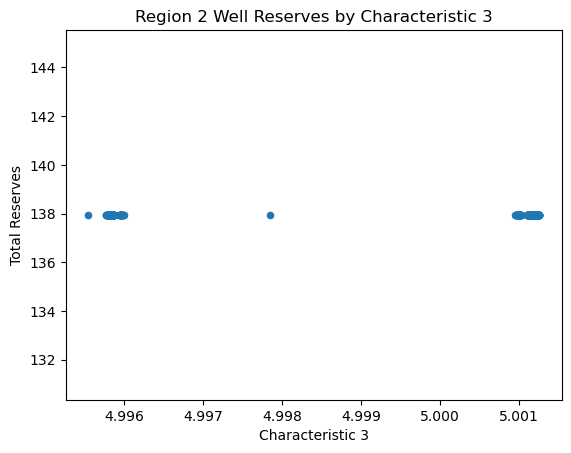

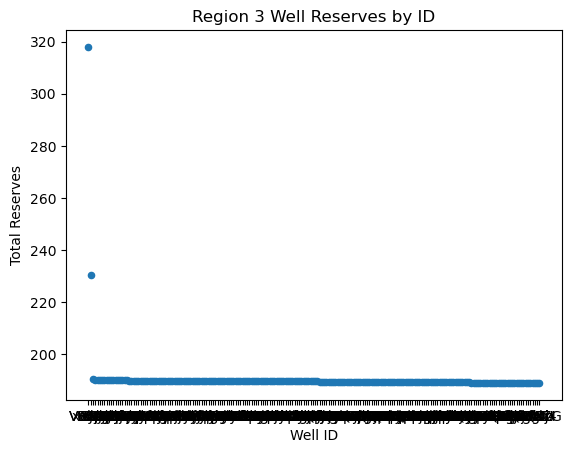

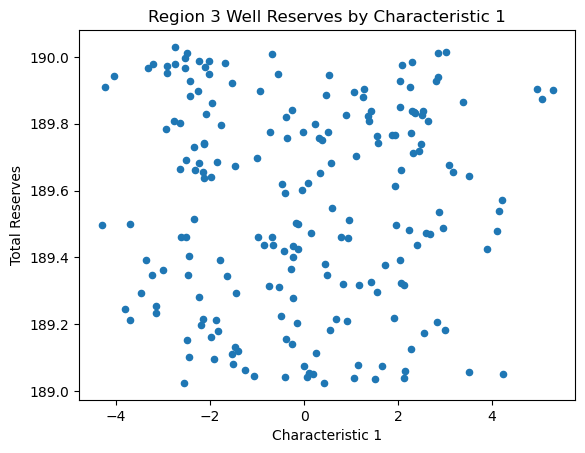

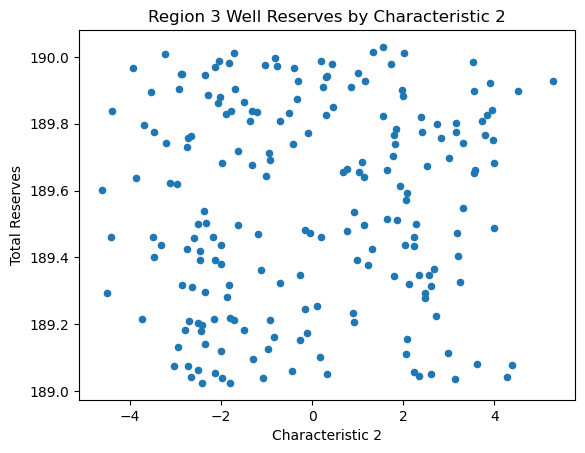

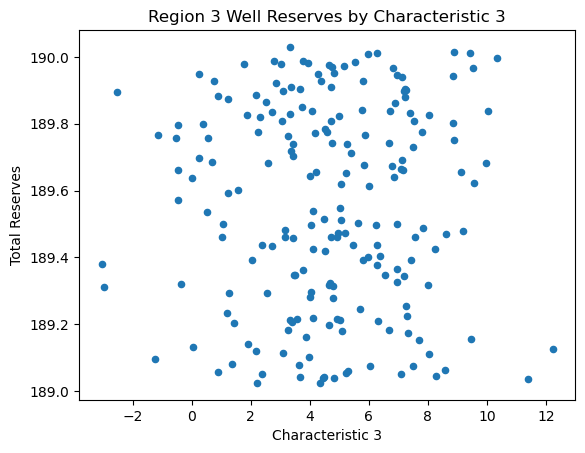

In [141]:
plot(geo_data_0, 'id', 'Well ID', 'Region 1 Well Reserves by ID')
plot(geo_data_0, 'f0', 'Characteristic 1', 'Region 1 Well Reserves by Characteristic 1')
plot(geo_data_0, 'f1', 'Characteristic 2', 'Region 1 Well Reserves by Characteristic 2')
plot(geo_data_0, 'f2', 'Characteristic 3', 'Region 1 Well Reserves by Characteristic 3')

plot(geo_data_1, 'id', 'Well ID', 'Region 2 Well Reserves by ID')
plot(geo_data_1, 'f0', 'Characteristic 1', 'Region 2 Well Reserves by Characteristic 1')
plot(geo_data_1, 'f1', 'Characteristic 2', 'Region 2 Well Reserves by Characteristic 2')
plot(geo_data_1, 'f2', 'Characteristic 3', 'Region 2 Well Reserves by Characteristic 3')

plot(geo_data_2, 'id', 'Well ID', 'Region 3 Well Reserves by ID')
plot(geo_data_2, 'f0', 'Characteristic 1', 'Region 3 Well Reserves by Characteristic 1')
plot(geo_data_2, 'f1', 'Characteristic 2', 'Region 3 Well Reserves by Characteristic 2')
plot(geo_data_2, 'f2', 'Characteristic 3', 'Region 3 Well Reserves by Characteristic 3')

<h2>Data Modeling</h2>


This function will split, scale and create a model that can be used for all three dataframes

In [142]:
#function to split, scale, and model data
def split_scale_model_data (data_train, data_valid, df, features_train, target_train, features_valid, target_valid, region):
    data_train, data_valid = train_test_split(df, test_size=0.25, train_size = 0.75, random_state=54321, shuffle=True)

    features_train = data_train.drop(['id', 'product'], axis=1)
    target_train = data_train['product']
    features_valid = data_valid.drop(['id', 'product'], axis=1)
    target_valid = data_valid['product']

    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
 
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    mean = predictions_valid.mean()


    result = mean_squared_error(target_valid, predictions_valid)**0.5
    print('RMSE of the linear regression model on the validation set for', region,':', result)
    print('The average volume of production of the linear regression model on the validation set for', region, 'is', mean, 'barrels')
    return predictions_valid

This code creates the necessary variables and calls the above function for all three dataframes. It seems that the second set of data is not as productive as the first and third, and the third dataframe is the most productive for its validation set; however, more work can be done to confirm this.

In [143]:
geo0_train = pd.DataFrame()
geo1_train = pd.DataFrame()
geo2_train = pd.DataFrame()
geo0_valid = pd.DataFrame()
geo1_valid = pd.DataFrame()
geo2_valid = pd.DataFrame()
features0_train = pd.DataFrame()
features1_train = pd.DataFrame()
features2_train = pd.DataFrame()
target0_train = pd.DataFrame()
target1_train = pd.DataFrame()
target2_train = pd.DataFrame()
features0_valid = pd.DataFrame()
features1_valid = pd.DataFrame()
features2_valid = pd.DataFrame()
target0_valid = pd.DataFrame()
target1_valid = pd.DataFrame()
target2_valid = pd.DataFrame()

geo0_model = split_scale_model_data(geo0_train, geo0_valid, geo_data_0, features0_train, target0_train, features0_valid, target0_valid, 'Region 1')
geo1_model = split_scale_model_data(geo1_train, geo1_valid, geo_data_1, features1_train, target1_train, features1_valid, target1_valid, 'Region 2')
geo2_model = split_scale_model_data(geo2_train, geo2_valid, geo_data_2, features2_train, target2_train, features2_valid, target2_valid, 'Region 3')




RMSE of the linear regression model on the validation set for Region 1 : 37.68341093860808
The average volume of production of the linear regression model on the validation set for Region 1 is 92.15921155743655 barrels
RMSE of the linear regression model on the validation set for Region 2 : 0.8922819708481464
The average volume of production of the linear regression model on the validation set for Region 2 is 68.44594093153303 barrels
RMSE of the linear regression model on the validation set for Region 3 : 40.15250541784855
The average volume of production of the linear regression model on the validation set for Region 3 is 94.92229500787454 barrels


<h2>Calculating Profits</h2>


Variables for calculating profit

In [144]:
total_budget = 100000000
total_points = 500
best_points = 200
unit_revenue = 4500
budget_per_well = total_budget / best_points
maximum_loss = 0.025
barrel_revenue = 4.5

Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [145]:
def volume_reserve_comparison(df, region):

    min_volume = budget_per_well / unit_revenue
    print('A sufficient reserve would be', min_volume)

    total_avg_reserves = df['product'].mean()
    print('The average reserve for all of', region, 'is', total_avg_reserves)

    avg_reserves_top_200 = df['product'].sort_values(ascending=False).head(200).mean()
    print('The average reserve for the top 200 wells for', region, 'is', avg_reserves_top_200)

    if total_avg_reserves < min_volume and avg_reserves_top_200 < min_volume:
        print('There are not enough reserves in', region, 'to make a profit')
    elif total_avg_reserves < min_volume and avg_reserves_top_200 > min_volume:
        print('While taking into account the average of', region, 'there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit')
    elif total_avg_reserves > min_volume and avg_reserves_top_200 > min_volume:
        print('There are enough reserves in', region, 'to make a profit')
    elif total_avg_reserves > min_volume and avg_reserves_top_200 < min_volume:
        print('While taking into account the average of', region, 'there are enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is not enough to make a profit')
    else:
        print('The values of the averages are equal')

    return min_volume

    

In [146]:
geo0_volume = volume_reserve_comparison(geo_data_0, 'Region 1')
geo1_volume = volume_reserve_comparison(geo_data_1, 'Region 2')
geo2_volume = volume_reserve_comparison(geo_data_2, 'Region 3')

A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 1 is 92.49999999999974
The average reserve for the top 200 wells for Region 1 is 184.83373964536023
While taking into account the average of Region 1 there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit
A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 2 is 68.82500000002561
The average reserve for the top 200 wells for Region 2 is 137.94540774090612
While taking into account the average of Region 2 there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit
A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 3 is 95.00000000000041
The average reserve for the top 200 wells for Region 3 is 189.55147698176654
While taking into account the average of Region

Write a function to calculate profit from a set of selected oil wells and model predictions:

4.1. Pick the wells with the highest values of predictions.
4.2. Summarize the target volume of reserves in accordance with these predictions
4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [211]:
def selected_profit(geo_model, geo_volume, region):

    #variables
    prediction = geo_model
    target_volume = geo_volume
    column_name=['predicted_volume']

    #converting to a dataframe and sorting values
    prediction_data = pd.DataFrame(data=prediction, columns=column_name) 
    prediction_data = prediction_data.sort_values(by='predicted_volume', ascending=False)
    prediction_data = prediction_data.rename(columns={0: 'predicted_volume'})
    prediction_data = prediction_data.reset_index()
    prediction_data.drop(['index'], axis=1, inplace=True)

    #converting top 200 values to a dataframe
    top_prediction = prediction_data.head(200)
    top_prediction = top_prediction.rename(columns={0: 'predicted_volume'})
    top_prediction = top_prediction.reset_index()
    top_prediction.drop(['index'], axis=1, inplace=True)

    #calculating average volume
    prediction_mean = prediction_data['predicted_volume'].mean()
    top_prediction_mean = top_prediction['predicted_volume'].mean()

    #boxplots
    top_prediction.boxplot('predicted_volume', figsize=(12,7))
   # prediction_data.boxplot('predicted_volume', figsize=(12,7))

    #printing relevant values
    plt.show()
    print('The average of predicted volumes for the entirety of', region, 'is', prediction_mean)
    print('The average of predicted volumes for the top 200 wells in', region, 'is' , top_prediction_mean)

    if prediction_mean < target_volume and top_prediction_mean < target_volume:
        print('It is predicted that there are not enough reserves in all of', region, 'to make a profit')
    elif prediction_mean < target_volume and top_prediction_mean > target_volume:
        print('While taking into account the predicted average of', region, ' it is predicted there are not enough reserves in the average to make a profit; however, the predicted average of the top 200 wells in the region is enough to make a profit')
    elif prediction_mean > target_volume and top_prediction_mean > target_volume:
        print('It is predicted that there are enough reserves in', region, 'to make a profit')
    elif prediction_mean > target_volume and top_prediction_mean < target_volume:
        print('While taking into account the predicted average of', region, 'it is predicted that there are enough reserves in the average to make a profit; however, the predicted average of the top 200 wells in the region is not enough to make a profit')
    else:
        print('The values of the averages are equal')
    
    #calculating profit
    prediction_data['predicted_profit'] = prediction_data['predicted_volume'] * unit_revenue
    top_prediction['predicted_profit'] = top_prediction['predicted_volume'] * unit_revenue

    display(prediction_data.head())
    display(top_prediction.head())


    return

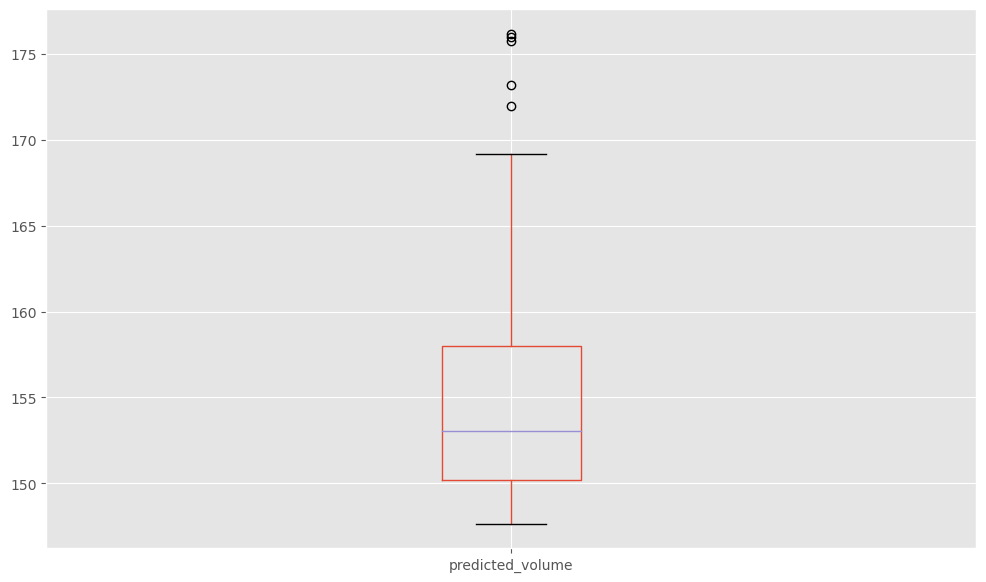

The average of predicted volumes for the entirety of Region 1 is 92.15921155743655
The average of predicted volumes for the top 200 wells in Region 1 is 154.79090582034456
While taking into account the predicted average of Region 1  it is predicted there are not enough reserves in the average to make a profit; however, the predicted average of the top 200 wells in the region is enough to make a profit


,predicted_volume,predicted_profit
0,176.187650,792844.427234
1,175.994241,791974.085005
2,175.779147,791006.161903
3,173.223660,779506.471255
4,171.952635,773786.858674


,predicted_volume,predicted_profit
0,176.187650,792844.427234
1,175.994241,791974.085005
2,175.779147,791006.161903
3,173.223660,779506.471255
4,171.952635,773786.858674


In [212]:
selected_profit(geo0_model, geo0_volume, 'Region 1')

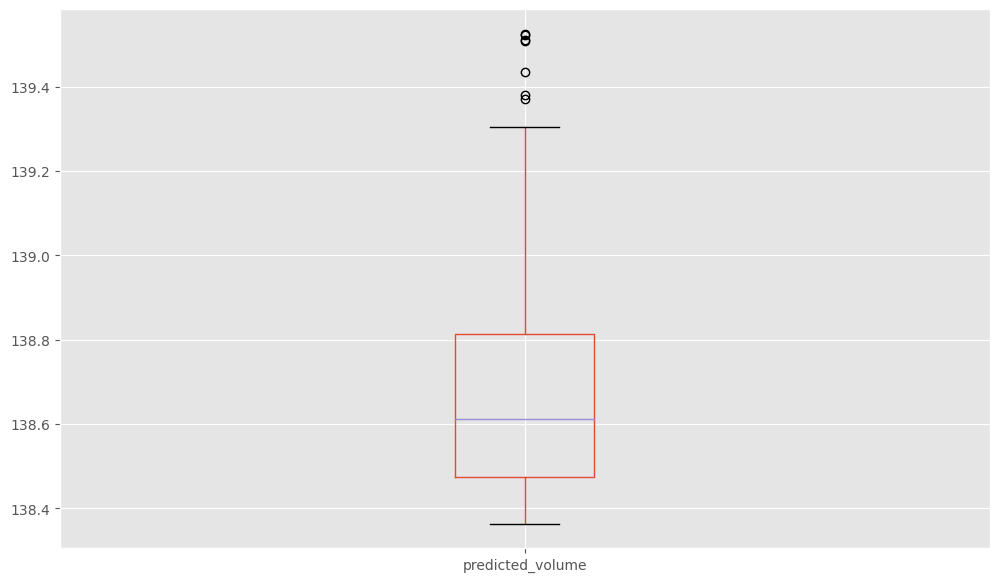

The average of predicted volumes for the entirety of Region 2 is 68.44594093153285
The average of predicted volumes for the top 200 wells in Region 2 is 138.68235285742855
While taking into account the predicted average of Region 2  it is predicted there are not enough reserves in the average to make a profit; however, the predicted average of the top 200 wells in the region is enough to make a profit


,predicted_volume,predicted_profit
0,139.525949,627866.768457
1,139.523854,627857.342349
2,139.511601,627802.204330
3,139.508035,627786.157379
4,139.434892,627457.013278


,predicted_volume,predicted_profit
0,139.525949,627866.768457
1,139.523854,627857.342349
2,139.511601,627802.204330
3,139.508035,627786.157379
4,139.434892,627457.013278


In [213]:
selected_profit(geo1_model, geo1_volume, 'Region 2')

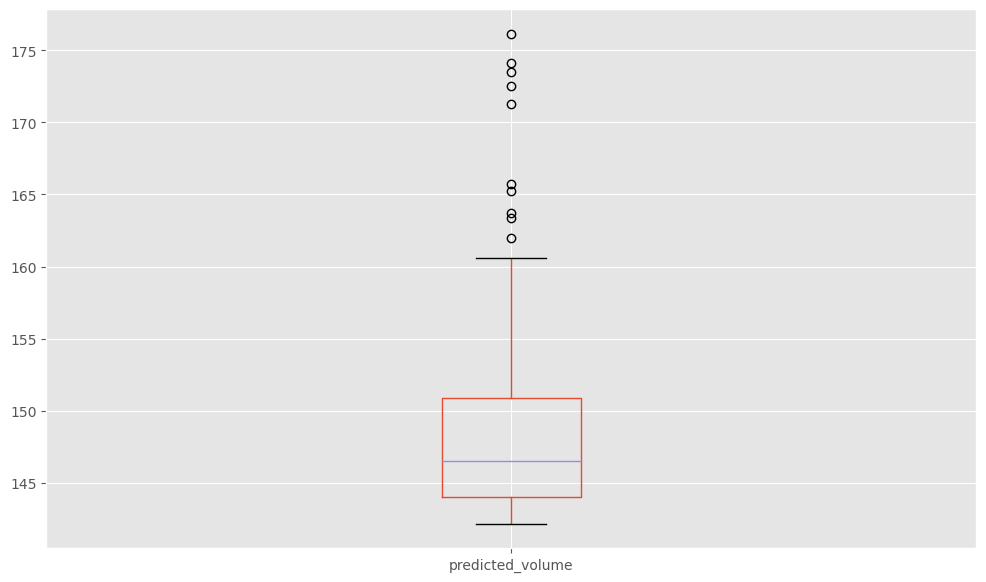

The average of predicted volumes for the entirety of Region 3 is 94.92229500787502
The average of predicted volumes for the top 200 wells in Region 3 is 148.55447810285847
While taking into account the predicted average of Region 3  it is predicted there are not enough reserves in the average to make a profit; however, the predicted average of the top 200 wells in the region is enough to make a profit


,predicted_volume,predicted_profit
0,176.150855,792678.849738
1,174.120006,783540.025466
2,173.520633,780842.850347
3,172.502624,776261.806222
4,171.256833,770655.748927


,predicted_volume,predicted_profit
0,176.150855,792678.849738
1,174.120006,783540.025466
2,173.520633,780842.850347
3,172.502624,776261.806222
4,171.256833,770655.748927


In [214]:
selected_profit(geo2_model, geo2_volume, 'Region 3')